# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown 'https://drive.google.com/uc?id=1nXgzN9_D3qPEByPvrEyLUcy4dBRCLb1f'

Downloading...
From: https://drive.google.com/uc?id=1nXgzN9_D3qPEByPvrEyLUcy4dBRCLb1f
To: /content/data.zip
68.5MB [00:01, 34.8MB/s]


In [ ]:
!unzip data.zip

# Data Cleaning

In [ ]:
import os
import shutil

PATH = 'data/'

train_count = 0
test_count = 0
classes = os.listdir(os.path.join(PATH, "test/"))

for cl in classes:
    print(cl, ":", len(os.listdir(os.path.join(PATH, "train", cl))))
    train_count += len(os.listdir(os.path.join(PATH, "train", cl)))

print("total train images:", train_count)

for cl in classes:
    print(cl, ":", len(os.listdir(os.path.join(PATH, "test", cl))))
    test_count += len(os.listdir(os.path.join(PATH, "test", cl)))

print("total test images:", test_count)

disgusted : 436
sad : 4830
neutral : 4965
fearful : 4097
happy : 7215
angry : 3995
surprised : 3171
total train images: 28709
disgusted : 111
sad : 1247
neutral : 1233
fearful : 1024
happy : 1774
angry : 958
surprised : 831
total test images: 7178


In [ ]:
# copying angry, surprised and disgusted pics from test folder to train folder

names = os.listdir("data/train/surprised")
for name in names:
  new = name.replace('im', 'img')
  os.rename(os.path.join("data/train/surprised", name), os.path.join("data/train/surprised", new))

images = os.listdir("data/test/surprised")
for i in images:
  shutil.copy(os.path.join("data/test/surprised", i), "data/train/surprised")
  if len(os.listdir("data/train/surprised")) == 4000:
    break

names = os.listdir("data/train/disgusted")
for name in names:
  new = name.replace('im', 'img')
  os.rename(os.path.join("data/train/disgusted", name), os.path.join("data/train/disgusted", new))

images = os.listdir("data/test/disgusted")
for i in images:
  shutil.copy(os.path.join("data/test/disgusted", i), "data/train/disgusted")

names = os.listdir("data/train/angry")
for name in names:
  new = name.replace('im', 'img')
  os.rename(os.path.join("data/train/angry", name), os.path.join("data/train/angry", new))

images = os.listdir("data/test/angry")
for i in images:
  shutil.copy(os.path.join("data/test/angry", i), "data/train/angry")
  if len(os.listdir("data/train/angry")) == 4000:
    break

In [ ]:
# Deleting pics from all categories with more than 4000 pics(train)

del_list = []

for cl in classes:
  l = os.listdir(os.path.join("data/train", cl))
  if len(l) > 4000:
    for i in l[4000:]:
      del_list.append(os.path.join("data/train", cl, i))
print(len(del_list))

for i in del_list:
  os.remove(i)

5107


In [ ]:
# Deleting pics from all categories with more than 1000 pics(test)

del_list = []

for cl in classes:
  l = os.listdir(os.path.join("data/test", cl))
  if len(l) > 1000:
    for i in l[1000:]:
      del_list.append(os.path.join("data/test", cl, i))
print(len(del_list))

for i in del_list:
  os.remove(i)

1278


In [ ]:
PATH = 'data/'

train_count = 0
test_count = 0
classes = os.listdir(os.path.join(PATH, "test/"))

for cl in classes:
    print(cl, ":", len(os.listdir(os.path.join(PATH, "train", cl))))
    train_count += len(os.listdir(os.path.join(PATH, "train", cl)))

print("total train images:", train_count)

for cl in classes:
    print(cl, ":", len(os.listdir(os.path.join(PATH, "test", cl))))
    test_count += len(os.listdir(os.path.join(PATH, "test", cl)))

print("total test images:", test_count)

disgusted : 547
sad : 4000
neutral : 4000
fearful : 4000
happy : 4000
angry : 4000
surprised : 4000
total train images: 24547
disgusted : 111
sad : 1000
neutral : 1000
fearful : 1000
happy : 1000
angry : 958
surprised : 831
total test images: 5900


# Model

In [ ]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1

In [ ]:
IMAGE_SIZE = [48, 48]
epochs = 150
BATCH_SIZE = 32
PATH = './data/'

In [ ]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001),input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(7, kernel_size=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(7, kernel_size=(4, 4), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 20, 128)       5

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
      os.path.join(PATH, "train"),
      target_size=(48,48),
      batch_size=BATCH_SIZE,
      color_mode="grayscale",
      class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
      os.path.join(PATH, "test"),
      target_size=(48,48),
      batch_size=BATCH_SIZE,
      color_mode="grayscale",
      class_mode='categorical')

Found 24547 images belonging to 7 classes.
Found 5900 images belonging to 7 classes.


In [ ]:
train_generator.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [ ]:
r = model.fit(
  train_generator,
  validation_data=val_generator,
  epochs=epochs,
  steps_per_epoch=train_count//BATCH_SIZE,
  validation_steps=test_count//BATCH_SIZE
)

Epoch 1/150
767/767 [==============================] - 29s 28ms/step - loss: 1.8289 - accuracy: 0.2432 - val_loss: 1.6671 - val_accuracy: 0.3434
Epoch 2/150
767/767 [==============================] - 20s 27ms/step - loss: 1.6334 - accuracy: 0.3736 - val_loss: 1.7098 - val_accuracy: 0.3227
Epoch 3/150
767/767 [==============================] - 20s 26ms/step - loss: 1.5408 - accuracy: 0.4225 - val_loss: 1.8906 - val_accuracy: 0.2609
Epoch 4/150
767/767 [==============================] - 20s 26ms/step - loss: 1.4908 - accuracy: 0.4457 - val_loss: 1.4205 - val_accuracy: 0.4803
Epoch 5/150
767/767 [==============================] - 20s 25ms/step - loss: 1.4450 - accuracy: 0.4624 - val_loss: 1.3694 - val_accuracy: 0.4944
Epoch 6/150
767/767 [==============================] - 20s 26ms/step - loss: 1.4230 - accuracy: 0.4772 - val_loss: 1.3846 - val_accuracy: 0.4898
Epoch 7/150
767/767 [==============================] - 19s 25ms/step - loss: 1.4007 - accuracy: 0.4906 - val_loss: 1.3466 - val_ac

In [ ]:
model.save("model.hdf5")

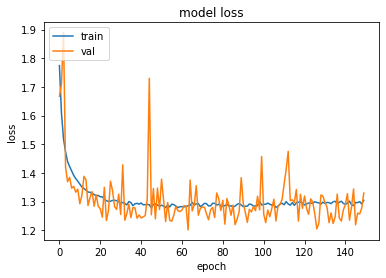

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

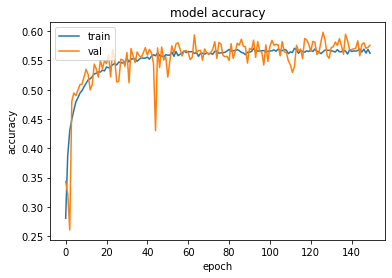

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()